In [834]:
# import the modules
import os
os.getcwd()
os.listdir()



['.ipynb_checkpoints',
 'DataDictionary.xlsx',
 'FIFA_Project_Student Template.ipynb',
 'sample_submission.csv',
 'submission.csv',
 'test_fifa.csv',
 'train_fifa.csv']

In [902]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

In [903]:
# Code starts here
# read data
train = pd.read_csv('train_fifa.csv')
test = pd.read_csv('test_fifa.csv')


In [904]:
train.head()


,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [905]:
test.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM


In [906]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           14384 non-null  int64  
 1   Name         14384 non-null  object 
 2   Age          14384 non-null  int64  
 3   Nationality  14384 non-null  object 
 4   Overall      14384 non-null  int64  
 5   Potential    14384 non-null  int64  
 6   Club         14173 non-null  object 
 7   Value (M)    14384 non-null  float64
 8   Wage (M)     14384 non-null  float64
 9   Position     14384 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [907]:
train.shape

(14384, 10)

In [908]:
test.shape

(3597, 9)

In [909]:
y=train['Value (M)']

In [910]:
Id = train['Id']

In [911]:
# drop name Variable as it has no impact on the o/p
train.drop(['Name'], axis=1, inplace=True)

Text(0.5, 1.0, 'Distribution of target variable')

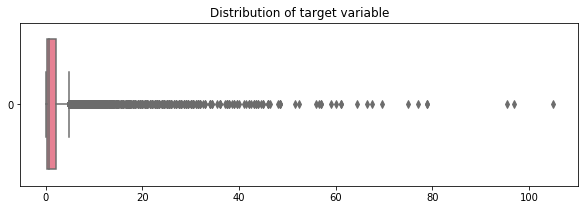

In [912]:
# Target Variable distribution
plt.figure(figsize=(10,3))
sns.boxplot(data = train['Value (M)'], orient='horizontal', palette='husl')
plt.title("Distribution of target variable")

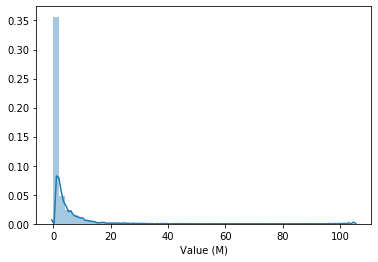

In [913]:

sns.distplot(train['Value (M)'])

In [914]:
train.describe().drop(['Id','Value (M)'], axis=1)

,Age,Overall,Potential,Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000
mean,25.148776,66.237695,71.181869,0.011435
std,4.620911,6.954458,6.074111,0.022614
min,16.000000,46.000000,46.000000,0.000000
25%,21.000000,62.000000,67.000000,0.002000
50%,25.000000,66.000000,71.000000,0.004000
75%,28.000000,71.000000,75.000000,0.012000
max,47.000000,94.000000,94.000000,0.565000


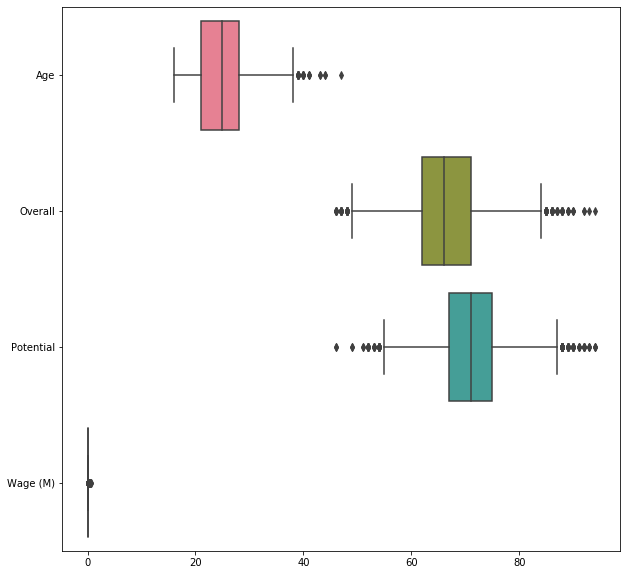

In [915]:
# Feature variables distribution
plt.figure(figsize=(10,10))
sns.boxplot(data=train.drop(columns=['Value (M)','Id']), orient='horizontal', palette='husl')

In [916]:
train = train.loc[:, ~train.columns.isin(['Id','Value (M)'])]
train.head()

,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,25,Germany,54,58,Korona Kielce,0.001,CDM
1,21,Italy,64,73,Cagliari,0.010,CM
2,21,Belgium,72,79,Atalanta,0.013,RB
3,21,Northern Ireland,57,66,Stevenage,0.002,CM
4,19,Argentina,63,75,Boca Juniors,0.002,LB


In [917]:
train.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Wage (M)',
       'Position'],
      dtype='object')

In [918]:
numeric_train = train.select_dtypes(include=np.number)
numeric_train.head()

,Age,Overall,Potential,Wage (M)
0,25,54,58,0.001
1,21,64,73,0.010
2,21,72,79,0.013
3,21,57,66,0.002
4,19,63,75,0.002


In [919]:
categoric_train = train.select_dtypes(exclude=np.number)
categoric_train.head()

,Nationality,Club,Position
0,Germany,Korona Kielce,CDM
1,Italy,Cagliari,CM
2,Belgium,Atalanta,RB
3,Northern Ireland,Stevenage,CM
4,Argentina,Boca Juniors,LB


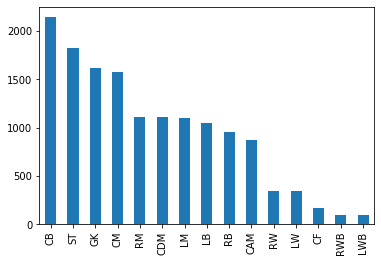

In [920]:
categoric_train['Position'].value_counts().plot(kind='bar')

In [921]:
categoric_train['Nationality'].value_counts()

England                1288
Germany                 902
Spain                   805
Argentina               774
France                  771
                       ... 
Guatemala                 1
Grenada                   1
Belize                    1
Burundi                   1
São Tomé & Príncipe       1
Name: Nationality, Length: 158, dtype: int64

In [922]:
categoric_train['Club'].value_counts()

Villarreal CF             33
FC Nantes                 31
Stoke City                30
Southampton               30
Burnley                   30
                          ..
Clube Atlético Mineiro    13
Adelaide United           13
Bray Wanderers            13
Santiago Wanderers        12
Universidad de Chile      12
Name: Club, Length: 647, dtype: int64

In [923]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categoric_train['Nationality']= le.fit_transform(categoric_train['Nationality'])
categoric_train['Position']= le.fit_transform(categoric_train['Position'])
categoric_train['Club']= le.fit_transform(categoric_train['Club'].astype(str))

In [924]:
categoric_train.head()

,Nationality,Club,Position
0,58,349,2
1,76,130,4
2,12,59,10
3,109,561,4
4,5,87,6


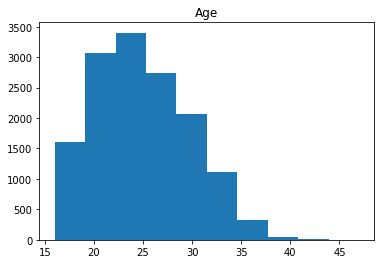

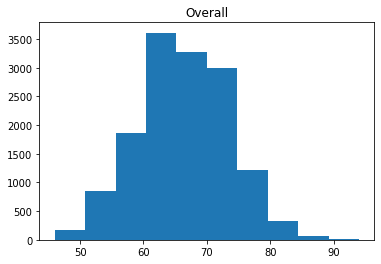

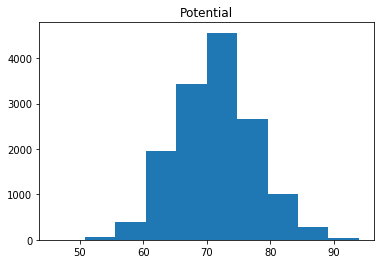

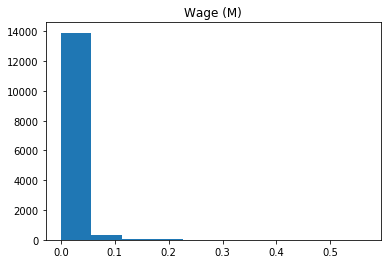

In [925]:
for i in numeric_train:
    plt.title(i)
    plt.hist(numeric_train[i])
    plt.show()

In [926]:
numeric_train.corr()

,Age,Overall,Potential,Wage (M)
Age,1.000000,0.459678,-0.224055,0.149757
Overall,0.459678,1.000000,0.678228,0.589736
Potential,-0.224055,0.678228,1.000000,0.512910
Wage (M),0.149757,0.589736,0.512910,1.000000


In [927]:
combined_data =pd.concat([numeric_train,categoric_train], axis=1)
combined_data.head()

,Age,Overall,Potential,Wage (M),Nationality,Club,Position
0,25,54,58,0.001,58,349,2
1,21,64,73,0.010,76,130,4
2,21,72,79,0.013,12,59,10
3,21,57,66,0.002,109,561,4
4,19,63,75,0.002,5,87,6


In [928]:
combined_data.shape

(14384, 7)

In [929]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(combined_data)
combined_data.loc[:,:] = scaled_values

In [930]:
# # defining a normalisation function 
# def normalize (x): 
#     return ( (x-np.median(x))/ (max(x) - min(x)))
                                            
                                              
# # applying normalize ( ) to all columns 
# combined_data = combined_data.apply(normalize)

In [931]:
# concatenate output y to the overall data
combined_data =pd.concat([combined_data,y], axis=1)
combined_data.head()

,Age,Overall,Potential,Wage (M),Nationality,Club,Position,Value (M)
0,0.290323,0.166667,0.250000,0.001770,0.369427,0.539413,0.142857,0.07
1,0.161290,0.375000,0.562500,0.017699,0.484076,0.200927,0.285714,0.70
2,0.161290,0.541667,0.687500,0.023009,0.076433,0.091190,0.714286,3.70
3,0.161290,0.229167,0.416667,0.003540,0.694268,0.867079,0.285714,0.16
4,0.096774,0.354167,0.604167,0.003540,0.031847,0.134467,0.428571,0.55


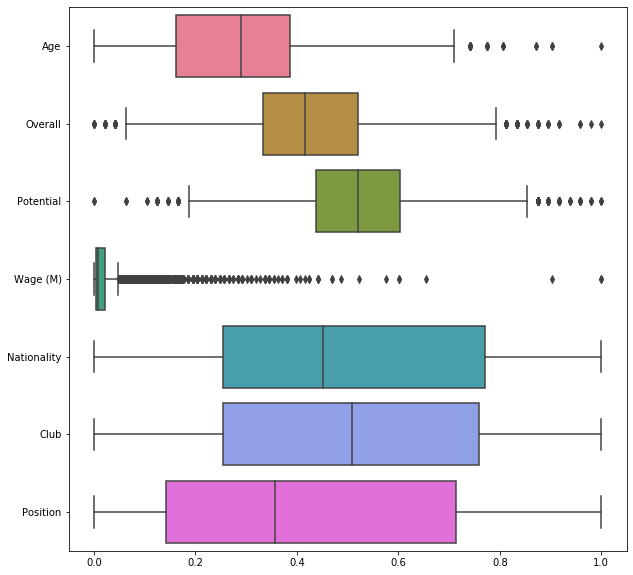

In [932]:
# Feature variables distribution
plt.figure(figsize=(10,10))
sns.boxplot(data=combined_data.drop(['Value (M)'],axis=1), orient='horizontal', palette='husl')

In [933]:
#lets remove outliers for Age, Overall, Potential and Wage (M) Variables

columns = ['Age','Overall','Potential','Wage (M)']
for col in columns:
    Q1= combined_data[col].quantile(0.25)
    Q3= combined_data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_limit =Q1-1.5*IQR
    upper_limit =Q3+1.5*IQR    
    combined_data = combined_data[(combined_data[col]>round(lower_limit,5)) & (combined_data[col]<round(upper_limit,5))]    

In [934]:
combined_data.shape

(12734, 8)

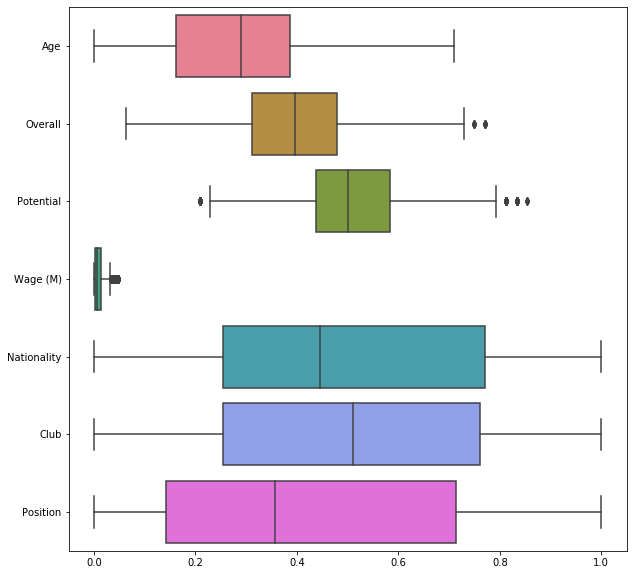

In [935]:
# Feature variables distribution
plt.figure(figsize=(10,10))
sns.boxplot(data=combined_data.drop(['Value (M)'],axis=1), orient='horizontal', palette='husl')

In [867]:
combined_data.corr()

,Age,Overall,Potential,Wage (M),Nationality,Club,Position,Value (M)
Age,1.000000,0.512973,-0.306269,0.228678,-0.038272,-0.011662,-0.055066,0.093908
Overall,0.512973,1.000000,0.545444,0.640987,-0.047266,0.008099,-0.036574,0.660355
Potential,-0.306269,0.545444,1.000000,0.455370,-0.028091,0.017357,-0.013724,0.566204
Wage (M),0.228678,0.640987,0.455370,1.000000,-0.030454,-0.078685,0.013145,0.587784
Nationality,-0.038272,-0.047266,-0.028091,-0.030454,1.000000,0.002762,-0.001521,-0.010607
Club,-0.011662,0.008099,0.017357,-0.078685,0.002762,1.000000,0.005823,0.001647
Position,-0.055066,-0.036574,-0.013724,0.013145,-0.001521,0.005823,1.000000,0.000855
Value (M),0.093908,0.660355,0.566204,0.587784,-0.010607,0.001647,0.000855,1.000000


In [868]:
y=combined_data['Value (M)']

In [869]:
combined_data.head()

,Age,Overall,Potential,Wage (M),Nationality,Club,Position,Value (M)
0,25,54,58,0.001,58,349,2,0.07
1,21,64,73,0.010,76,130,4,0.70
2,21,72,79,0.013,12,59,10,3.70
3,21,57,66,0.002,109,561,4,0.16
4,19,63,75,0.002,5,87,6,0.55


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [870]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combined_data.drop(['Value (M)'], axis=1), y, test_size = 0.3, random_state=100)

In [871]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_stats = sm.add_constant(X_train)

In [872]:
lm = sm.OLS(y_train,X_train_stats).fit()   # Running the linear model

In [873]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     1478.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:32:14   Log-Likelihood:                -15266.
No. Observations:                8754   AIC:                         3.055e+04
Df Residuals:                    8746   BIC:                         3.060e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11.0972      0.310    -35.819      

In [874]:
X_train.head()

,Age,Overall,Potential,Wage (M),Nationality,Club,Position
10793,33,66,66,0.002,54,591,2
1472,19,55,71,0.001,79,332,1
5936,26,68,70,0.005,118,125,1
2211,27,58,60,0.001,61,300,1
12606,23,73,79,0.017,54,333,10


In [875]:
X_train.drop(['Position'], axis=1, inplace=True)

In [876]:
X_train.head()

,Age,Overall,Potential,Wage (M),Nationality,Club
10793,33,66,66,0.002,54,591
1472,19,55,71,0.001,79,332
5936,26,68,70,0.005,118,125
2211,27,58,60,0.001,61,300
12606,23,73,79,0.017,54,333


In [877]:
X_train_stats = sm.add_constant(X_train)

In [878]:
lm = sm.OLS(y_train,X_train_stats).fit()   # Running the linear model

In [879]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     1725.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:32:49   Log-Likelihood:                -15266.
No. Observations:                8754   AIC:                         3.055e+04
Df Residuals:                    8747   BIC:                         3.060e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11.0722      0.307    -36.068      

In [880]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [881]:
# Calculating Vif value
vif_cal(input_data=combined_data, dependent_col='Value (M)')

,Var,Vif
1,Overall,669.86
2,Potential,336.60
0,Age,82.60
5,Club,4.06
4,Nationality,3.62
6,Position,2.89
3,Wage (M),2.82


In [882]:
X_train.drop(['Overall'], axis=1, inplace=True)
X_test.drop(['Position','Overall'], axis=1, inplace=True)

In [883]:
X_test.head()

,Age,Potential,Wage (M),Nationality,Club
1476,23,62,0.002,45,77
13561,31,69,0.006,133,467
9380,22,76,0.010,71,104
7454,30,74,0.023,99,646
4792,26,64,0.001,133,199


In [884]:
X_train.head()

,Age,Potential,Wage (M),Nationality,Club
10793,33,66,0.002,54,591
1472,19,71,0.001,79,332
5936,26,70,0.005,118,125
2211,27,60,0.001,61,300
12606,23,79,0.017,54,333


In [885]:
# Calculating Vif value
vif_cal(input_data=combined_data, dependent_col='Value (M)')
# All the vif values are less so there is no multicolinearity between the variables

,Var,Vif
1,Overall,669.86
2,Potential,336.60
0,Age,82.60
5,Club,4.06
4,Nationality,3.62
6,Position,2.89
3,Wage (M),2.82


In [886]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_pred,y_test ))
print(r2_score(y_pred, y_test))


1.5215673575996793
0.21882329922712795


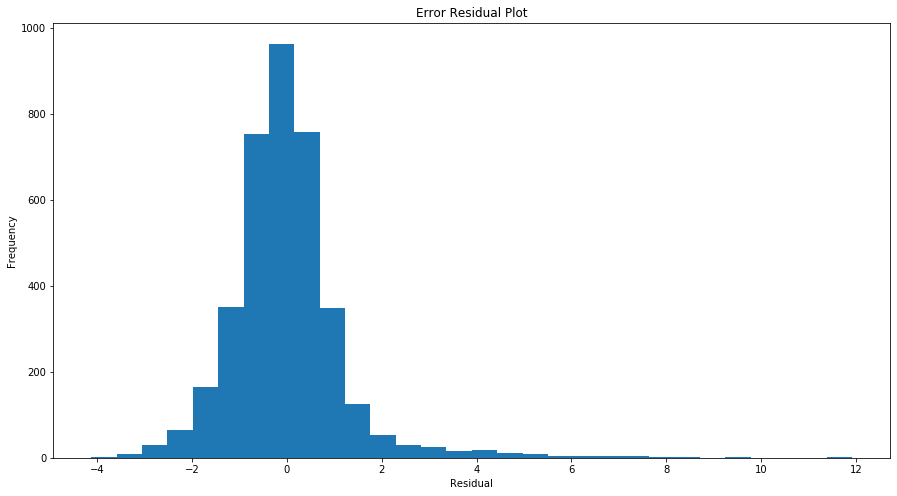

In [887]:
# Code starts here
residual = (y_test - y_pred)
plt.figure(figsize=(15,8))
plt.hist(residual,bins=30)
plt.xlabel("Residual")
plt.ylabel('Frequency')
plt.title("Error Residual Plot")
plt.show()

In [888]:
# read the dataset and extract the features and target separately



### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

In [889]:
# Code Starts here








# Code ends here

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [890]:
# Code Starts here








# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [891]:
# Code Starts here
Id = test['Id']
test =test.drop(['Name','Id','Position','Overall'], axis=1)











# Code ends here

In [892]:
test['Nationality']= le.fit_transform(test['Nationality'])
#test['Position']= le.fit_transform(test['Position'])
test['Club']= le.fit_transform(test['Club'].astype(str))
test.head()

,Age,Nationality,Potential,Club,Wage (M)
0,28,73,82,468,0.046
1,23,36,85,375,0.105
2,22,77,74,305,0.007
3,27,62,65,419,0.002
4,27,45,67,258,0.001


In [822]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(test)
test.loc[:,:] = scaled_values

test.head()

,Age,Nationality,Potential,Club,Wage (M)
0,0.478261,0.603306,0.739130,0.724458,0.129577
1,0.260870,0.297521,0.804348,0.580495,0.295775
2,0.217391,0.636364,0.565217,0.472136,0.019718
3,0.434783,0.512397,0.369565,0.648607,0.005634
4,0.434783,0.371901,0.413043,0.399381,0.002817


In [893]:
test_pred = model.predict(test)


In [894]:
print(test_pred)

[10205.96703123 10572.43004808  9210.57109153 ...  8581.31487212
  9827.13672648  9950.79941251]


In [895]:
submission = pd.DataFrame({'Id':Id,
                           'Value (M)': test_pred})


In [896]:
submission.head()

,Id,Value (M)
0,280,10205.967031
1,569,10572.430048
2,8731,9210.571092
3,10085,8088.383234
4,9831,8334.149599


In [897]:
submission = submission.set_index('Id')

In [898]:
submission.to_csv('submission.csv')